# Chart Remake - Google Trends: Hangover Cure

This is a remake of chartr.co plot using matplotlib. Note that the dataset date range is different.

--- 

@date: 05-Sep-2020 | @author: katnoria

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
def version_info(cls):
    print(f"{cls.__name__}: {cls.__version__}")

In [3]:
print("Library VersionInfo:")
print("-"*20)
version_info(pd)
version_info(matplotlib)

Library VersionInfo:
--------------------
pandas: 0.24.2
matplotlib: 3.1.3


# Data 💰

We have downloaded the data and made available on the github, so we will just use that.

In [14]:
df = pd.read_csv("../data/us-90days.csv", parse_dates=["Day"])

In [15]:
# Basic info and stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
Day                               90 non-null datetime64[ns]
hangover cure: (United States)    90 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [16]:
df.describe()

,hangover cure: (United States)
count,90.000000
mean,29.633333
std,18.847973
min,6.000000
25%,16.000000
50%,22.000000
75%,42.750000
max,100.000000


In [17]:
# see first few rows
df.head()

,Day,hangover cure: (United States)
0,2020-05-30,55
1,2020-05-31,57
2,2020-06-01,20
3,2020-06-02,12
4,2020-06-03,16


In [18]:
df.columns = ['Day', 'Count']
df.head()

,Day,Count
0,2020-05-30,55
1,2020-05-31,57
2,2020-06-01,20
3,2020-06-02,12
4,2020-06-03,16


In [19]:
# Add a weekend mask for filtering data
weekends = df.Day.dt.weekday >= 5
df.head()

,Day,Count
0,2020-05-30,55
1,2020-05-31,57
2,2020-06-01,20
3,2020-06-02,12
4,2020-06-03,16


# Plot 📈

We are now ready to create the line chart.

In [102]:
def generate_plot(df):
    fig, ax = plt.subplots(figsize=(14,8))
    # locator = mdates.AutoDateLocator()
    # formatter = mdates.ConciseDateFormatter(locator)
    formatter = mdates.DateFormatter("%b-%d")
    ax.xaxis.set_major_formatter(formatter)

    # ax.xaxis.set_major_locator(locator)
    # ax.xaxis.set_major_formatter(formatter)    

    for label in ax.get_xticklabels():
        label.set_rotation(40)

    ax.plot(df.Day, df.Count, color='black')
    ax.bar(df[weekends].Day, [100]*len(df[weekends].Day), alpha=0.2)
    ax.set_title("Data is Beautiful: \n Hangovers Are Not", fontsize=30, color="darkblue", pad=30)
    ax.set_ylabel("Google Search Volume (Indexed, 100 = Maximum)")
    
    return ax

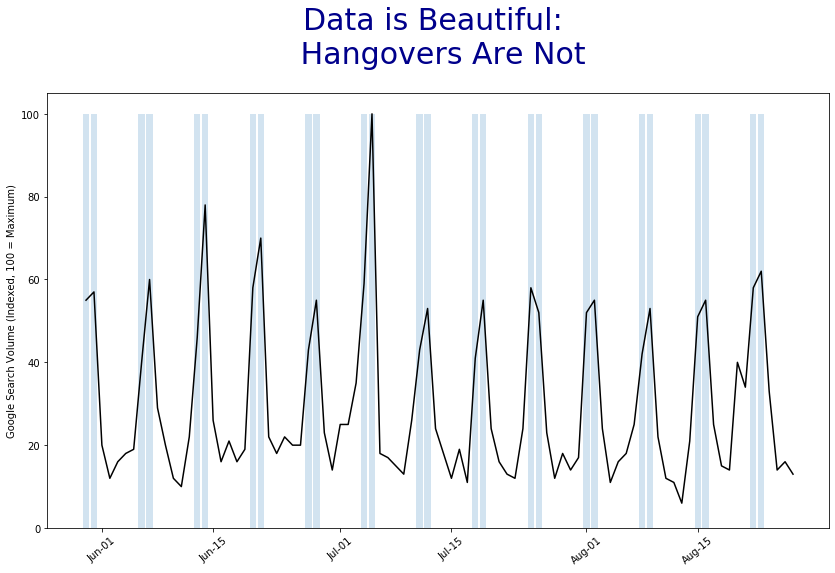

In [103]:
ax = generate_plot(df)
plt.show()

Next, we add the annotations

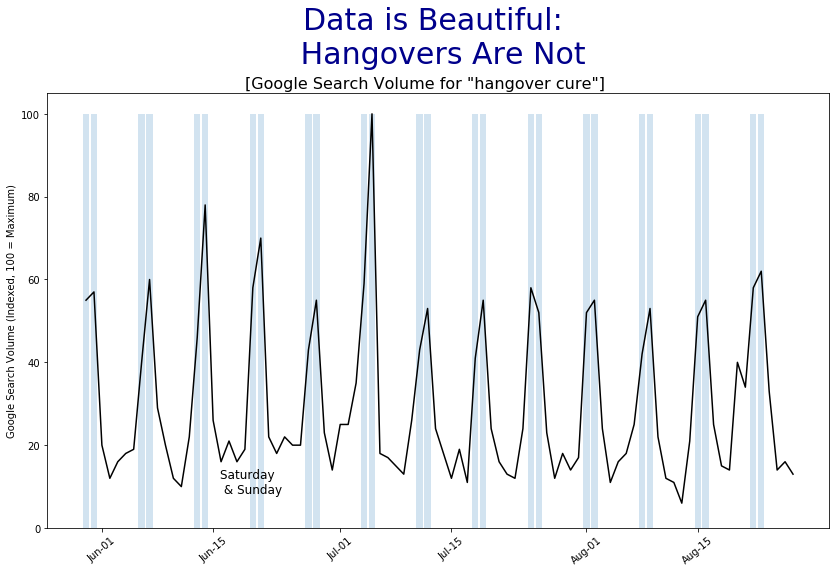

In [107]:
ax = generate_plot(df)
ax.annotate('Saturday \n & Sunday',
            xy=(220, 80), xycoords='figure pixels',
            fontsize=12
           )
plt.suptitle("[Google Search Volume for \"hangover cure\"]", fontsize=16, color="black", y=.91)
plt.show()

And there it is 😎
---
I am adding the same plot in other libraries and langauges for fun. You can check them out here